### **Fraud Detection with Isolation Forests**
 **Goal:** Detect potential fraudulent transactions using Isolation Forest, an unsupervised algorithm that isolates anomalies.

**Install Required Libraries**

In [27]:
!pip install pandas scikit-learn matplotlib seaborn

**Load or Simulate Transaction Data**

In [28]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Define sample sizes
n_samples = 1000
n_frauds = 15

# Generate features
amount = np.random.normal(50, 15, n_samples)
time = np.random.uniform(0, 24, n_samples)
location_score = np.random.uniform(0.7, 1.0, n_samples)

# Add fraudulent patterns to the last n_frauds
amount[-n_frauds:] = np.random.normal(200, 20, n_frauds)
location_score[-n_frauds:] = np.random.uniform(0.0, 0.3, n_frauds)

# Create DataFrame
df = pd.DataFrame({
    'amount': amount,
    'time': time,
    'location_score': location_score
})


**Visualize the Data**

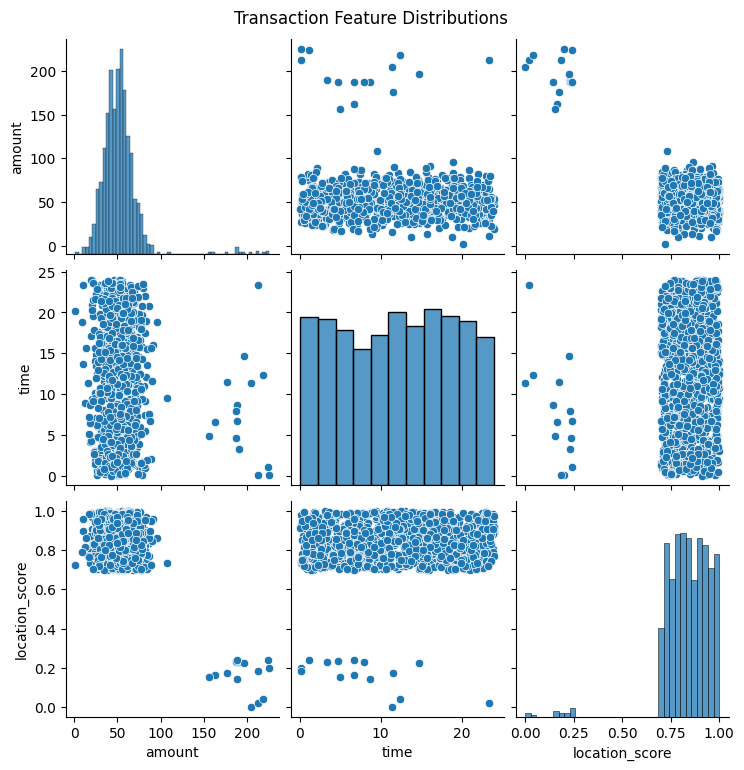

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)
plt.suptitle("Transaction Feature Distributions", y=1.02)
plt.show()


**Apply Isolation Forest**

In [30]:
from sklearn.ensemble import IsolationForest

# Define features only
X = df[['amount', 'time', 'location_score']]

# Create and fit the model
model = IsolationForest(n_estimators=100, contamination=n_frauds / n_samples)
model.fit(X)

# Predict anomalies
df['anomaly_score'] = model.decision_function(X)
df['anomaly'] = model.predict(X)

# Map predictions: 1 -> normal (0), -1 -> anomaly (1)
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})


**Visualize Anomalies**

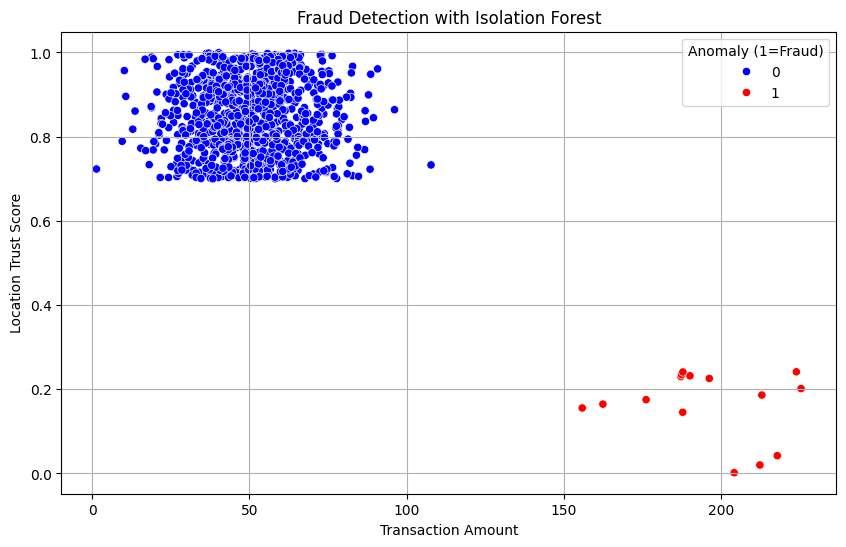

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='amount', y='location_score', hue='anomaly', palette={0: 'blue', 1: 'red'})
plt.title("Fraud Detection with Isolation Forest")
plt.xlabel("Transaction Amount")
plt.ylabel("Location Trust Score")
plt.legend(title='Anomaly (1=Fraud)')
plt.grid(True)
plt.show()

**Evaluate Performance**

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       985
           1       1.00      1.00      1.00        15

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



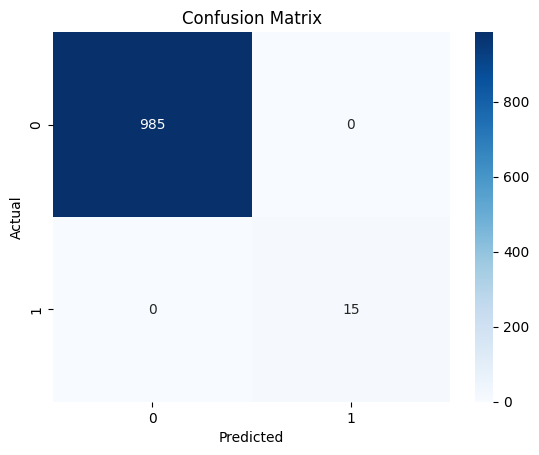

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

# Add ground truth: mark the last n_frauds as actual frauds
df['actual'] = 0
df.loc[df.index[-n_frauds:], 'actual'] = 1

# Print evaluation metrics
print("Classification Report:\n", classification_report(df['actual'], df['anomaly']))

# Plot confusion matrix
cm = confusion_matrix(df['actual'], df['anomaly'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### **Summary**
In this project, we used Isolation Forest to detect fraud in a simulated dataset of 1000 transactions, where 15 were fake. The model learned what normal transactions look like and marked anything very different as fraud.

We visualized the data, applied the model, and showed the results in a plot. Then we checked how well it worked by comparing the model's predictions to the actual frauds.

Even without using labeled data during training, the model was able to find most of the fake transactions. This shows that Isolation Forest is a useful tool for finding fraud when you don't have much labeled data.